# Python Pandas

One of the best options for working with tabular data in Python is to use the 
**Python Data Analysis Library (Pandas)**. 
The Pandas library provides data structures, produces high quality plots with matplotlib and integrates nicely with other libraries that use NumPy (which is another Python library) arrays.



In [1]:
# Load library as a alias
import pandas as pd

In [2]:
# Make sure figures appear inline in Ipython Notebook
%matplotlib inline

### Read in data comma separated value file into data frame 
<img src="images/import.png" alt="import data" width="500"/>

In [3]:
# Note that pd.read_csv is used because we imported pandas as pd
pd.read_csv("surveys.csv")

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


### What is our data?
<img src="images/metadata.png" alt="data description" width="500"/>

In [4]:
surveys_df = pd.read_csv("surveys.csv")

## Useful Ways to View DataFrame objects in Python

Summarize and access the data stored in DataFrames using attributes and methods provided by the DataFrame object.

**Attributes** are accessed using the DataFrame object name followed by the attribute name `df_object.attribute`

Examples of attributes:


In [5]:
# List of column names
surveys_df.columns

Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')

In [6]:
# Shape (dimensions) of array
surveys_df.shape

(35549, 9)

In [7]:
# Data types
surveys_df.dtypes

record_id            int64
month                int64
day                  int64
year                 int64
plot_id              int64
species_id          object
sex                 object
hindfoot_length    float64
weight             float64
dtype: object

**Methods** are called using the syntax `df_object.method()` 

Examples of methods:

In [8]:
# Look at the start of the data:
surveys_df.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


## Quick Statistics in a Pandas DataFrame

Let’s get a list of all the species. 
The `pd.unique` function tells us all of the unique values in the species_id column.


In [9]:
# Unique list of species
pd.unique(surveys_df['species_id'])

array(['NL', 'DM', 'PF', 'PE', 'DS', 'PP', 'SH', 'OT', 'DO', 'OX', 'SS',
       'OL', 'RM', nan, 'SA', 'PM', 'AH', 'DX', 'AB', 'CB', 'CM', 'CQ',
       'RF', 'PC', 'PG', 'PH', 'PU', 'CV', 'UR', 'UP', 'ZL', 'UL', 'CS',
       'SC', 'BA', 'SF', 'RO', 'AS', 'SO', 'PI', 'ST', 'CU', 'SU', 'RX',
       'PB', 'PL', 'PX', 'CT', 'US'], dtype=object)

### Groups in Pandas

We often want to calculate summary statistics grouped by subsets or attributes within fields of our data. For example, we might want to calculate the average weight of all individuals per site.


In [10]:
# We can calculate basic statistics for all records in a single column:
surveys_df['weight'].describe()

count    32283.000000
mean        42.672428
std         36.631259
min          4.000000
25%         20.000000
50%         37.000000
75%         48.000000
max        280.000000
Name: weight, dtype: float64

In [11]:
# Or all numeric data
surveys_df.describe()

,record_id,month,day,year,plot_id,hindfoot_length,weight
count,35549.000000,35549.000000,35549.000000,35549.000000,35549.000000,31438.000000,32283.000000
mean,17775.000000,6.474022,16.105966,1990.475231,11.397001,29.287932,42.672428
std,10262.256696,3.396583,8.256691,7.493355,6.799406,9.564759,36.631259
min,1.000000,1.000000,1.000000,1977.000000,1.000000,2.000000,4.000000
25%,8888.000000,4.000000,9.000000,1984.000000,5.000000,21.000000,20.000000
50%,17775.000000,6.000000,16.000000,1990.000000,11.000000,32.000000,37.000000
75%,26662.000000,9.000000,23.000000,1997.000000,17.000000,36.000000,48.000000
max,35549.000000,12.000000,31.000000,2002.000000,24.000000,70.000000,280.000000


But if we want to summarize by one or more variables, for example sex, we can use Pandas `.groupby` method. 

In [12]:
# Group data by sex
grouped_data = surveys_df.groupby('sex')

# Summary statistics for all numeric columns by sex
grouped_data['weight'].describe()


,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
F,15303.0,42.170555,36.847958,4.0,20.0,34.0,46.0,274.0
M,16879.0,42.995379,36.184981,4.0,20.0,39.0,49.0,280.0


### Creating Summary Counts in Pandas

Let’s next count the number of samples for each species. 
Use `groupby` combined with a `count()` method.

<AxesSubplot:xlabel='species_id'>

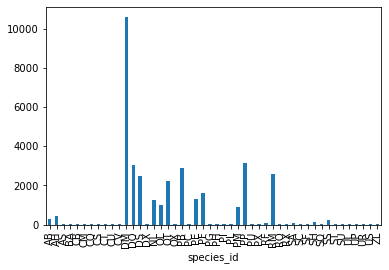

In [13]:
# Count the number of samples by species
species_counts = surveys_df.groupby('species_id')['record_id'].count()
#print(species_counts)

# Create a quick bar chart
species_counts.plot(kind='bar')

### How do I create a new column from existing columns?  
If we wanted to, we could perform math on an entire column (or columns) of our data and add it to the dataframe.

<img src="images/newcol.png" alt="new column" width="500"/>

In [14]:
# Example of basic math normalizing weight
(surveys_df['weight'] - surveys_df['weight'].mean()) / surveys_df['weight'].std()

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
35544         NaN
35545         NaN
35546   -0.782731
35547    0.227335
35548         NaN
Name: weight, Length: 35549, dtype: float64

To create a new column, use the `[]` brackets with the new column name at the left side of the assignment.

In [15]:
surveys_df['normalized_weight'] = (surveys_df['weight'] - surveys_df['weight'].mean()) / surveys_df['weight'].std()
#print(surveys_df)

# Indexing, Slicing and Subsetting DataFrames in Python

Selecting data using Labels (Column Headings)
We use square brackets `[]` to select a subset of a Python object. 

<img src="images/subset.png" alt="subsetting" width="500"/>

For example, we can select all data from a column named `species_id` from the `surveys_df` DataFrame by name. 
There are two ways to do this:

In [16]:
# Method 1: select a 'subset' of the data using the column name
surveys_df['species_id']

# Method 2: use the column name as an 'attribute'; gives the same output
surveys_df.species_id

0         NL
1         NL
2         DM
3         DM
4         DM
        ... 
35544     AH
35545     AH
35546     RM
35547     DO
35548    NaN
Name: species_id, Length: 35549, dtype: object

We can also create a new object that contains only the data within the species_id column as follows:

In [17]:
# Creates an object, surveys_species, that only contains the `species_id` column
surveys_species = surveys_df['species_id']

In [18]:
# Select the species and plot columns from the DataFrame
surveys_df[['species_id', 'plot_id']]

# What happens when you flip the order?

,species_id,plot_id
0,NL,2
1,NL,3
2,DM,2
3,DM,7
4,DM,3
...,...,...
35544,AH,15
35545,AH,15
35546,RM,10
35547,DO,7


### Extracting Range based Subsets: Slicing
Slicing using the `[]` operator selects a set of rows and/or columns from a DataFrame. 
To slice out a set of rows, you use the following syntax: `data[start:stop]`. 

When slicing in pandas the start bound is included in the output. The stop bound is one step BEYOND the row you want to select. 

In [19]:
# Select rows 0, 1, 2 (row 3 is not selected)
surveys_df[0:3]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,normalized_weight
0,1,7,16,1977,2,NL,M,32.0,NaN,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN,NaN


In [20]:
# Select the first 5 rows (rows 0, 1, 2, 3, 4)
surveys_df[:5]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,normalized_weight
0,1,7,16,1977,2,NL,M,32.0,NaN,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN,NaN


In [21]:
# Select the last element in the list
# (the slice starts at the last element, and ends at the end of the list)
surveys_df[-1:]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,normalized_weight
35548,35549,12,31,2002,5,NaN,NaN,NaN,NaN,NaN


### Slicing Subsets of Rows and Columns in Python

We can select specific ranges of our data in both the row and column directions using either label or integer-based indexing.

- loc is primarily label based indexing. Integers may be used but they are interpreted as a label.
- iloc is primarily integer based indexing

To select a subset of rows and columns from our DataFrame, we can use the iloc method. 

In [22]:
# iloc[row slicing, column slicing]
surveys_df.iloc[0:3, 1:4]

,month,day,year
0,7,16,1977
1,7,16,1977
2,7,16,1977


Let’s explore some other ways to index and select subsets of data:


In [23]:
# Select all columns for rows of index values 0 and 10
surveys_df.loc[[0, 10], :]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,normalized_weight
0,1,7,16,1977,2,NL,M,32.0,NaN,NaN
10,11,7,16,1977,5,DS,F,53.0,NaN,NaN


In [24]:
# What does this do?
surveys_df.loc[0, ['species_id', 'plot_id', 'weight']]


species_id     NL
plot_id         2
weight        NaN
Name: 0, dtype: object

In [25]:
# What happens when you type the code below?
#surveys_df.loc[[0, 10, 35549], :]

### Subsetting Data using Criteria
We can use the syntax below when querying data by criteria from a DataFrame. 

- Equals: `==`
- Not equals: `!=`
- Greater than, less than: `>` or `<`
- Greater than or equal to `>=`
- Less than or equal to `<=`

In [26]:
# Select all rows that have a year value of 2002
surveys_df[surveys_df.year == 2002]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,normalized_weight
33320,33321,1,12,2002,1,DM,M,38.0,44.0,0.036241
33321,33322,1,12,2002,1,DO,M,37.0,58.0,0.418429
33322,33323,1,12,2002,1,PB,M,28.0,45.0,0.063541
33323,33324,1,12,2002,1,AB,NaN,NaN,NaN,NaN
33324,33325,1,12,2002,1,DO,M,35.0,29.0,-0.373245
...,...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0,-0.782731
35547,35548,12,31,2002,7,DO,M,36.0,51.0,0.227335


In [27]:
#We can define sets of criteria too:
surveys_df[(surveys_df.year >= 1980) & (surveys_df.year <= 1985)]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,normalized_weight
2270,2271,1,15,1980,8,DO,M,35.0,53.0,0.281933
2271,2272,1,15,1980,11,PF,F,16.0,10.0,-0.891928
2272,2273,1,15,1980,18,DM,F,34.0,33.0,-0.264048
2273,2274,1,15,1980,11,DM,M,38.0,37.0,-0.154852
2274,2275,1,15,1980,8,DO,F,33.0,29.0,-0.373245
...,...,...,...,...,...,...,...,...,...,...
11222,11223,12,8,1985,4,DM,M,36.0,40.0,-0.072955
11223,11224,12,8,1985,11,DM,M,37.0,49.0,0.172737
11224,11225,12,8,1985,7,PE,M,20.0,18.0,-0.673535
11225,11226,12,8,1985,1,DM,M,38.0,47.0,0.118139


## Export a dataframe to a file

Next, let’s drop all the rows that contain missing values using `dropna`. 
By default, dropna removes rows that contain missing data for even just one column.

In [28]:
df_na = surveys_df.dropna()

We can now use the to_csv command to export a DataFrame in CSV format. 
Note that the code below will by default save the data into the current working directory. 



In [29]:
# Write DataFrame to CSV
df_na.to_csv('surveys_complete.csv', index=False)

# Combining DataFrames with Pandas

In many research situations, the data that we want to use come in multiple files. We often need to combine these files into a single DataFrame to analyze the data. The pandas package provides various methods for combining DataFrames including `merge` and `concat`.

Load the species and surveys files into pandas DataFrames.

In [30]:
surveys_df = pd.read_csv("surveys.csv", keep_default_na=False, na_values=[""])

In [31]:
species_df = pd.read_csv("species.csv", keep_default_na=False, na_values=[""])

### Concatenating DataFrames
Use the `concat` function in pandas to append either columns or rows from one DataFrame to another. 

In [32]:
# Read in first 10 lines of surveys table
survey_sub = surveys_df.head(10)

# Grab the last 10 rows
survey_sub_last10 = surveys_df.tail(10)

# Reset the index values to the second dataframe appends properly
survey_sub_last10 = survey_sub_last10.reset_index(drop=True)
     # drop=True option avoids adding new index column with old index values

When we concatenate DataFrames, we need to specify the axis. 

- axis=0 tells pandas to stack the second DataFrame UNDER the first one. It will automatically detect whether the column names are the same and will stack accordingly. 
- axis=1 will stack the columns in the second DataFrame to the RIGHT of the first DataFrame. 


In [33]:
# Stack the DataFrames on top of each other
vertical_stack = pd.concat([survey_sub, survey_sub_last10], axis=0)
#print(vertical_stack)


In [34]:
# Place the DataFrames side by side
horizontal_stack = pd.concat([survey_sub, survey_sub_last10], axis=1)
#print(horizontal_stack)

## Joining Two DataFrames
Combine or **join** DataFrames using columns in each dataset that contain common values. 

The columns containing the common values are called **join key(s)**. 

In [35]:
### Identifying join keys
# To identify appropriate join keys we first need to know 
# which field(s) are shared between the files (DataFrames). 

print(species_df.columns)

print(surveys_df.columns)

Index(['species_id', 'genus', 'species', 'taxa'], dtype='object')
Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')


Join key is the column containing the two-letter species identifier, which is called `species_id.`

There are different types of joins, so we need to decide which type of join makes sense for our analysis.

### Inner Join (default)

The pandas function for performing joins is called `merge` and an Inner join is the default option:

<img src="images/innerjoin.png" alt="Inner Join" width="250"/>


In [36]:
merged_inner = pd.merge(left=surveys_df, right=species_df, left_on='species_id', right_on='species_id')

# In this case `species_id` is the only column name in  both dataframes, so if we skipped `left_on`
# And `right_on` arguments we would still get the same result

# What's the size of the output data?
print(merged_inner.shape)
merged_inner

(34786, 12)


,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa
0,1,7,16,1977,2,NL,M,32.0,NaN,Neotoma,albigula,Rodent
1,2,7,16,1977,3,NL,M,33.0,NaN,Neotoma,albigula,Rodent
2,22,7,17,1977,15,NL,F,31.0,NaN,Neotoma,albigula,Rodent
3,38,7,17,1977,17,NL,M,33.0,NaN,Neotoma,albigula,Rodent
4,72,8,19,1977,2,NL,M,31.0,NaN,Neotoma,albigula,Rodent
...,...,...,...,...,...,...,...,...,...,...,...,...
34781,28988,12,23,1998,6,CT,NaN,NaN,NaN,Cnemidophorus,tigris,Reptile
34782,35512,12,31,2002,11,US,NaN,NaN,NaN,Sparrow,sp.,Bird
34783,35513,12,31,2002,11,US,NaN,NaN,NaN,Sparrow,sp.,Bird
34784,35528,12,31,2002,13,US,NaN,NaN,NaN,Sparrow,sp.,Bird


The result `merged_inner` DataFrame contains all of the columns from `surveys_df` (record id, month, day, etc.) as well as all the columns from `species_df` (species_id, genus, species, and taxa).

### Left joins
What if we want to add information from `species_df` to `surveys_df` without losing any of the information from `surveys_df`? In this case, we use a different type of join called a **left join**.

<img src="images/leftjoin.png" alt="Left Join" width="250"/>

A left join is performed in pandas by calling the same `merge` function used for inner join, but using the `how='left'` argument:


In [37]:
merged_left = pd.merge(left=surveys_df, right=species_df, how='left', left_on='species_id', right_on='species_id')
merged_left

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa
0,1,7,16,1977,2,NL,M,32.0,NaN,Neotoma,albigula,Rodent
1,2,7,16,1977,3,NL,M,33.0,NaN,Neotoma,albigula,Rodent
2,3,7,16,1977,2,DM,F,37.0,NaN,Dipodomys,merriami,Rodent
3,4,7,16,1977,7,DM,M,36.0,NaN,Dipodomys,merriami,Rodent
4,5,7,16,1977,3,DM,M,35.0,NaN,Dipodomys,merriami,Rodent
...,...,...,...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN,Ammospermophilus,harrisi,Rodent
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN,Ammospermophilus,harrisi,Rodent
35546,35547,12,31,2002,10,RM,F,15.0,14.0,Reithrodontomys,megalotis,Rodent
35547,35548,12,31,2002,7,DO,M,36.0,51.0,Dipodomys,ordii,Rodent


### References and Image Sources
This lesson is based on the [Data Carpentry curriculum "Data Analysis and Visualization in Python for Ecologists"]("https://datacarpentry.org/python-ecology-lesson/") and the [Pandas Getting Started introductory tutorials]("https://pandas.pydata.org/docs/getting_started/intro_tutorials/").
    